In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for dense layers
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Define the autoencoder architecture
input_img = Input(shape = (784,))

In [ ]:
# Encoder
encoded = Dense(128, activation = 'relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)

# Decoder
decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

In [ ]:
# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
# Print the model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat, epochs = 50, batch_size = 256,
                shuffle = True, validation_data = (x_test_flat, x_test_flat))

Epoch 1/50
235/235 [==============================] - 10s 34ms/step - loss: 0.2435 - val_loss: 0.1638
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1510 - val_loss: 0.1391
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1323 - val_loss: 0.1247
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1225 - val_loss: 0.1178
Epoch 5/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1166 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1127 - val_loss: 0.1096
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1096 - val_loss: 0.1065
Epoch 8/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1066 - val_loss: 0.1041
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1043 - val_loss: 0.1021
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1025 - val_l

In [ ]:
# Predict the test set
decoded_imgs = autoencoder.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


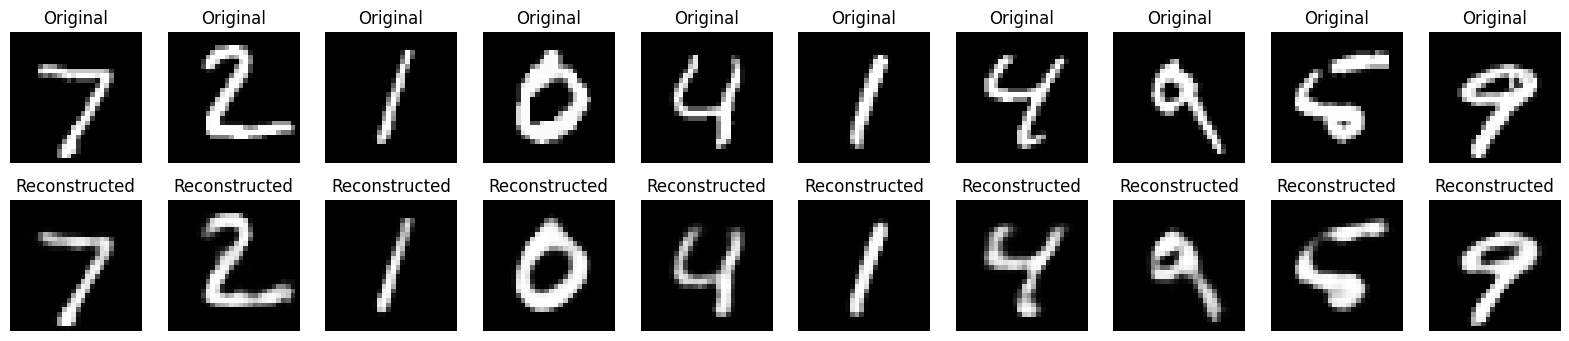

In [ ]:
# Visualize some of the original and reconstructed images
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap = 'gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import backend as K

In [12]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [13]:
input_shape = (28, 28, 1)
latent_dim = 2

In [14]:
# Encoder
inputs = Input(shape = input_shape, name = 'encoder_input')
x = Flatten()(inputs)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
latent = Dense(latent_dim, name = 'latent_space')(x)

# Decoder
x = Dense(64, activation = 'relu')(latent)
x = Dense(128, activation = 'relu')(x)
x = Dense(28 * 28, activation = 'sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

In [15]:
# Autoencoder model
autoencoder = Model(inputs, outputs, name = 'autoencoder')
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [16]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, validation_data = (x_test, x_test), verbose = 2)

Epoch 1/50
235/235 - 5s - loss: 0.2770 - val_loss: 0.2312 - 5s/epoch - 23ms/step
Epoch 2/50
235/235 - 4s - loss: 0.2230 - val_loss: 0.2125 - 4s/epoch - 18ms/step
Epoch 3/50
235/235 - 5s - loss: 0.2083 - val_loss: 0.2020 - 5s/epoch - 19ms/step
Epoch 4/50
235/235 - 4s - loss: 0.1984 - val_loss: 0.1940 - 4s/epoch - 16ms/step
Epoch 5/50
235/235 - 4s - loss: 0.1931 - val_loss: 0.1906 - 4s/epoch - 18ms/step
Epoch 6/50
235/235 - 5s - loss: 0.1900 - val_loss: 0.1880 - 5s/epoch - 21ms/step
Epoch 7/50
235/235 - 4s - loss: 0.1878 - val_loss: 0.1863 - 4s/epoch - 16ms/step
Epoch 8/50
235/235 - 4s - loss: 0.1859 - val_loss: 0.1850 - 4s/epoch - 16ms/step
Epoch 9/50
235/235 - 5s - loss: 0.1845 - val_loss: 0.1841 - 5s/epoch - 22ms/step
Epoch 10/50
235/235 - 4s - loss: 0.1833 - val_loss: 0.1830 - 4s/epoch - 17ms/step
Epoch 11/50
235/235 - 4s - loss: 0.1822 - val_loss: 0.1825 - 4s/epoch - 16ms/step
Epoch 12/50
235/235 - 5s - loss: 0.1812 - val_loss: 0.1814 - 5s/epoch - 23ms/step
Epoch 13/50
235/235 - 4s 

In [17]:
# Autoencoder latent space
encoder = Model(autoencoder.input, autoencoder.get_layer('latent_space').output)
latent_space = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


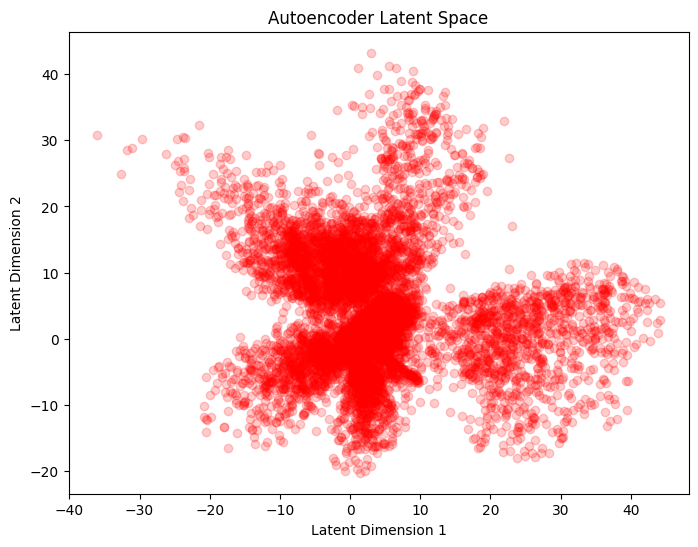

In [18]:
plt.figure(figsize = (8, 6))
plt.scatter(latent_space[:, 0], latent_space[:, 1], c = 'red', alpha = 0.2)
plt.title('Autoencoder Latent Space')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()